In [1]:
import yt
from yt.units import *
from header import *
from compute_MZgrad import get_density_cut

/Users/acharyya/opt/anaconda3/envs/astroconda/lib/python3.6/site-packages/yt/utilities/logger.py:4: VisibleDeprecationWarning: The configuration file /Users/acharyya/.config/yt/ytrc is deprecated in favor of /Users/acharyya/.config/yt/yt.toml. Currently, both are present. Please manually remove the deprecated one to silence this warning.
Deprecated since v4.0.0. This feature will be removed in v4.1.0
  from yt.config import ytcfg


In [2]:
ds = yt.load('/Users/acharyya/models/simulation_output/foggie/halo_008508/nref11c_nref9f/RD0030/RD0030')

yt : [INFO     ] 2023-02-07 14:35:31,464 Parameters: current_time              = 342.59335094489
yt : [INFO     ] 2023-02-07 14:35:31,465 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2023-02-07 14:35:31,465 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-02-07 14:35:31,466 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-02-07 14:35:31,467 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-02-07 14:35:31,467 Parameters: current_redshift          = 0.69999998985822
yt : [INFO     ] 2023-02-07 14:35:31,467 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2023-02-07 14:35:31,468 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2023-02-07 14:35:31,468 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2023-02-07 14:35:31,469 Parameters: hubble_constant           = 0.695


In [3]:
galrad = 10 # kpc
projection = 'y'
field = ('gas', 'metallicity')
units = 'Zsun'
cmap = old_metal_color_map
zmin, zmax = 1e-1, 3e0

In [4]:
center = ds.arr([41631.97617789, 40636.582029  , 42801.22612753], 'kpc') # from args.halo_center
# center = ds.arr([41634.02479345, 40640.37265041, 42800.25416985], 'kpc') # from refine_box.center
ds.halo_center_kpc = center
x_width = 2 * galrad * kpc
box = ds.r[center[0] - x_width / 2.: center[0] + x_width / 2., center[1] - x_width / 2.: center[1] + x_width / 2., center[2] - x_width / 2.: center[2] + x_width / 2.]

Parsing Hierarchy : 100%|██████████| 5804/5804 [00:00<00:00, 8685.58it/s]
yt : [INFO     ] 2023-02-07 14:35:32,436 Gathering a field list (this may take a moment.)


yt : [INFO     ] 2023-02-07 14:35:35,867 Projection completed
yt : [INFO     ] 2023-02-07 14:35:35,868 xlim = 42791.226128 42811.226128
yt : [INFO     ] 2023-02-07 14:35:35,868 ylim = 41621.976178 41641.976178
yt : [INFO     ] 2023-02-07 14:35:35,870 xlim = 0.505578 0.505815
yt : [INFO     ] 2023-02-07 14:35:35,870 ylim = 0.491764 0.492000
yt : [INFO     ] 2023-02-07 14:35:35,871 Making a fixed resolution buffer of (('gas', 'metallicity')) 800 by 800



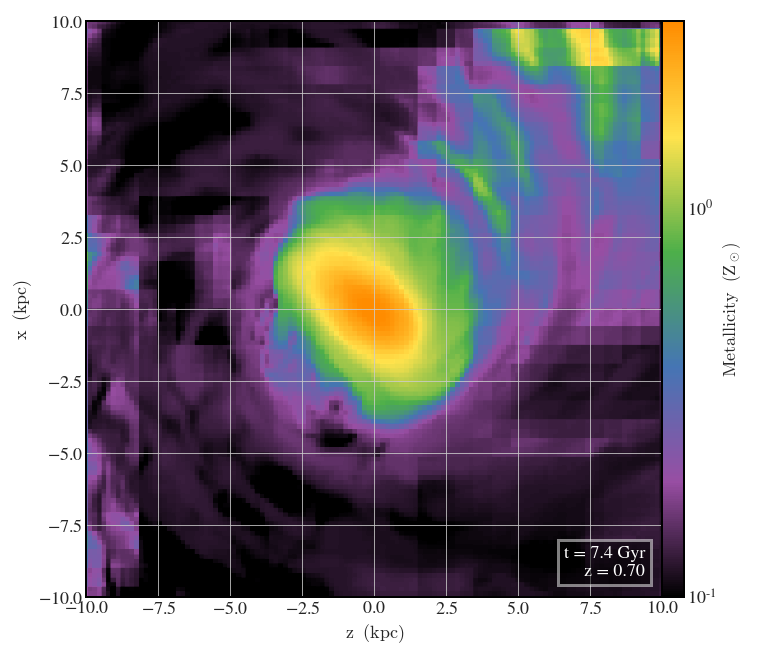

In [5]:
proj = yt.ProjectionPlot(ds, projection, field, center=center, data_source=box, width=x_width, weight_field=('gas', 'mass'))
proj.annotate_timestamp(corner='lower_right', redshift=True, draw_inset_box=True)
proj.set_unit(field, units)
proj.set_cmap(field, cmap)
proj.set_zlim(field, zmin=zmin, zmax=zmax)

In [6]:
rho_cut = get_density_cut(ds.current_time.in_units('Gyr'))  # based on Cassi's CGM-ISM density cut-off
ad = box.ds.all_data()
box2 = ad.cut_region(['obj["gas", "density"] > %.1E' % rho_cut])
print('Imposing a density criteria to get ISM above density', rho_cut, 'g/cm^3')
print(box2)

Imposing a density criteria to get ISM above density 2e-26 g/cm^3
YTCutRegion (RD0030): , base_object=YTRegion (RD0030): , center=[1.30583055e+26 1.30583055e+26 1.30583055e+26] cm cm, left_edge=[0. 0. 0.] cm cm, right_edge=[2.61166111e+26 2.61166111e+26 2.61166111e+26] cm cm, conditionals=['obj["gas", "density"] > 2.0E-26']


yt : [INFO     ] 2023-02-07 14:36:06,050 Projection completed
yt : [INFO     ] 2023-02-07 14:36:06,052 xlim = 42791.226128 42811.226128
yt : [INFO     ] 2023-02-07 14:36:06,052 ylim = 41621.976178 41641.976178
yt : [INFO     ] 2023-02-07 14:36:06,054 xlim = 0.505578 0.505815
yt : [INFO     ] 2023-02-07 14:36:06,054 ylim = 0.491764 0.492000
yt : [INFO     ] 2023-02-07 14:36:06,055 Making a fixed resolution buffer of (('gas', 'metallicity')) 800 by 800



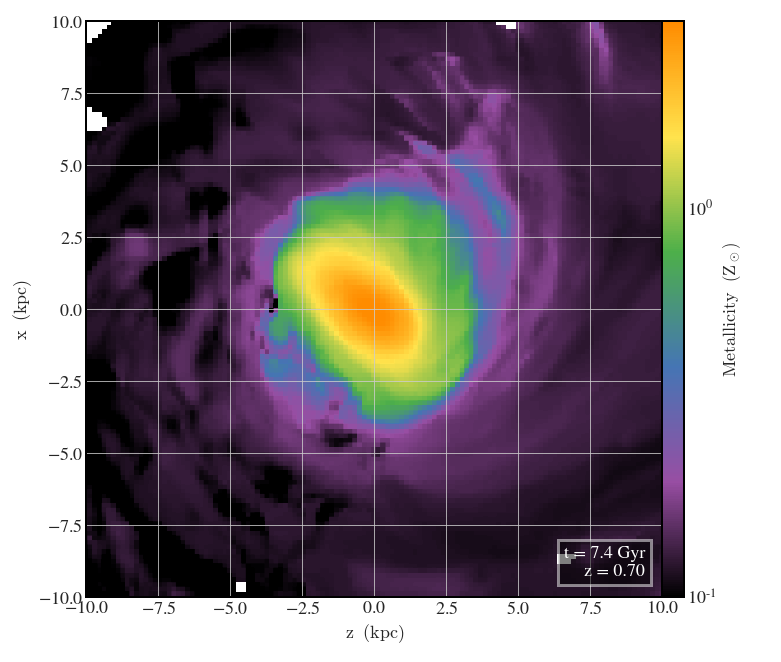

In [7]:
proj = yt.ProjectionPlot(ds, projection, field, center=center, data_source=box2, width=x_width, weight_field=('gas', 'mass'))
proj.annotate_timestamp(corner='lower_right', redshift=True, draw_inset_box=True)
proj.set_unit(field, units)
proj.set_cmap(field, cmap)
proj.set_zlim(field, zmin=zmin, zmax=zmax)


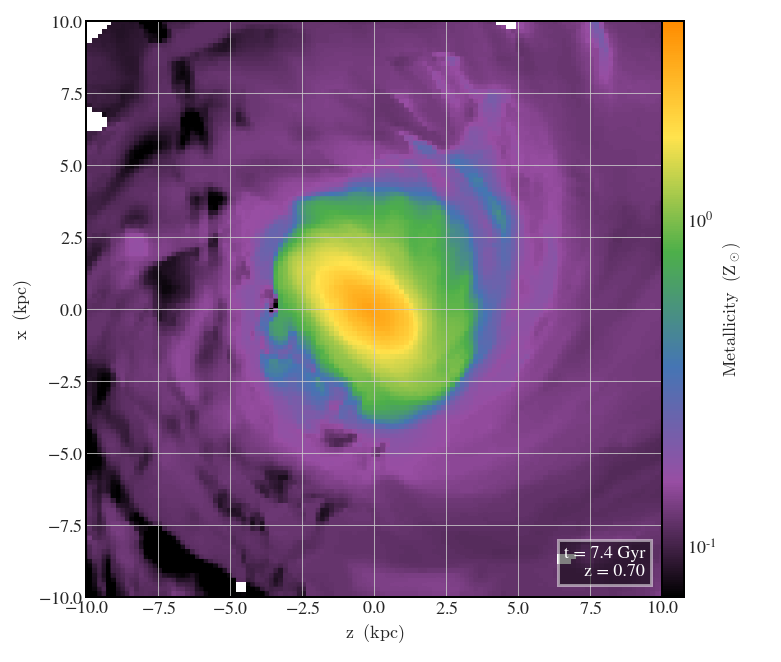

In [17]:
proj.set_zlim(field, zmin=7e-2, zmax=4e0)